In [139]:
import json

with open('data/osu_buildings.json', 'r') as f:
    buildings_gj = json.load(f)

In [ ]:
buildings_gj['type'] = 'fill'
#buildings_gj.pop('crs')
buildings_gj['source'] = buildings_gj['features']
buildings_gj.pop('features')

In [2]:
import plotly.graph_objects as go

C:\Users\colef\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\colef\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\colef\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
import pandas as pd

In [4]:
buildings = pd.read_csv('data/HackathonConfig.csv')

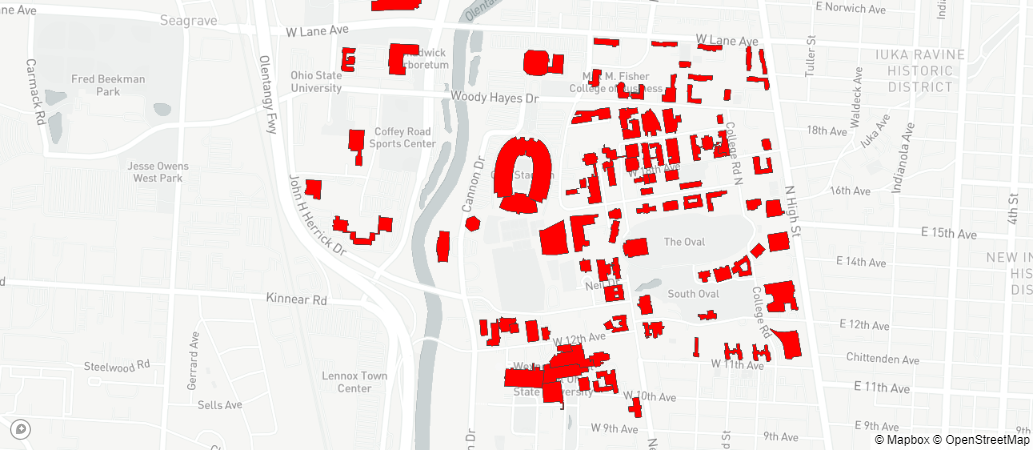

In [148]:
data = [go.Scattermapbox(
        lat=buildings.Latitude.astype(float).to_list(),
        lon=buildings.Longitude.astype(float).to_list(),
        mode='markers',
        marker=dict(
            size=3,
            opacity=0
        ),
        text=buildings.BuildingName.to_list()
    )]

layout = dict(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken='pk.eyJ1IjoiY3NtaXRoZHMiLCJhIjoiY2syaHV0dTZvMDd4MTNob2hpbTNodWl0aSJ9.DZvSZ91qr3P07AJA0tLU7w',
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=40.000,
            lon=-83.020
        ),
        pitch=0,
        zoom=14,
        layers=[
            dict(
                sourcetype = 'geojson',
                source = 'data/osu_buildings.json',
                type = 'fill',
                color = 'red'
            )
        ]
    ),
    margin=dict(b=0,l=0,r=0,t=0)
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [57]:
from pyproj import Proj, transform

inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:4326')
x1,y1 = -11705274.6374,4826473.6922
print(x2,y2)

[-83.0142038976915] [39.997358401271775]


In [ ]:
for i in range(0,len(buildings_gj['features'])):
    new_l = []
    for l in buildings_gj['features'][i]['geometry']['coordinates']:
        try:
            lats = [c[0] for c in l]
            lons = [c[1] for c in l]
            lats_4326,lons_4326 = transform(inProj,outProj,lats,lons)
        except:
            print(i)
            lats = [c[0] for c in l[0]]
            lons = [c[1] for c in l[0]]
            lats_4326,lons_4326 = transform(inProj,outProj,lats,lons)
        new_l.append(
            list(map(list, zip(lats_4326,lons_4326)))
        )
    buildings_gj['features'][i]['geometry']['coordinates'] = new_l

In [125]:
buildings['BuildingName'] = buildings.BuildingName.str.replace('Mendenhall Laboratory', 'Mendenhall, Thomas C, Laboratory')
buildings['BuildingName'] = buildings.BuildingName.str.replace('Page Hall', 'Page, Henry F, Hall')

In [141]:
buildings_gj_new = {
    "type": "FeatureCollection",
    "crs": {
        "type": "name",
        "properties": {
            "name": "urn:ogc:def:crs:EPSG::3857"
        }
    },
    "features": []
}
for f in buildings_gj['features']:
    if f['properties']['BLDG_NAME'] in buildings.BuildingName.unique():
        if f['geometry']['type'] == 'Polygon':
            buildings_gj_new['features'].append(f)

In [146]:
buildings = buildings[~buildings.BuildingName.str.contains('McCorkle|Veterinary').fillna(False)]

In [150]:
with open('data/osu_buildings.json', 'w') as f:
    json.dump(buildings_gj_new, f)